In [1]:
%pylab inline
import gc
import numpy as np
import astropy.io.fits as pyfits

from fpfs import fpfsBase

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


In [3]:
pltDir='plot/star/'
if not os.path.isdir(pltDir):
    os.mkdir(pltDir)

In [4]:
noiRev=True
C=2000
vdir='outStar-var7em3'
nbin=80
bins=np.linspace(-0.2,0.2,nbin+1)
dbin=bins[1]-bins[0]
cbins=(bins[:-1]+bins[1:])/2.
e1hist=np.zeros(nbin)
REhist=np.zeros(nbin)
nsim=1000

esum=0.
e2sum=0.
Rsum=0.
R2sum=0.
for ifield in range(nsim):
    fname1=os.path.join(vdir,'fpfs-rcut16-psf60-0/src%04d-g1-1111.fits' %(ifield))
    moments= pyfits.getdata(fname1)
    elli1=fpfsBase.fpfsM2E(moments,C,rev=noiRev)
    e1hist=e1hist+np.histogram(elli1['fpfs_e1'],bins=bins)[0]
    REhist=REhist+np.histogram(elli1['fpfs_RE'],bins=bins)[0]
    esum+=np.sum(elli1['fpfs_e1'])
    e2sum+=np.sum(elli1['fpfs_e1']**2.)
    Rsum+=np.sum(elli1['fpfs_RE'])
    R2sum+=np.sum(elli1['fpfs_RE']**2.)
    del moments
    gc.collect()

In [ ]:
fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(1,1,1)
ax.plot(cbins,e1hist/nsim/1e4/dbin,c='black',ls='-',label=r'$e_1$')
ax.plot(cbins,REhist/nsim/1e4/dbin,c='black',ls='--',label=r'$\mathcal{R}_e^\gamma$')
ax.vlines(x=0.,ymin=0,ymax=12, alpha=0.3,linestyles=':')
print(esum/nsim/1e4, np.sqrt(e2sum)/nsim/1e4)
print(Rsum/nsim/1e4, np.sqrt(R2sum)/nsim/1e4)
ax.set_xlabel('$e_1$, $R_e^\gamma$ ')
ax.set_ylabel('Number histogram')
ax.set_xlim(-0.2,0.2)
ax.set_ylim(0,12)
plt.legend()
fig.savefig(os.path.join(pltDir,'star_e_res.pdf'))

In [16]:
fname=os.path.join(vdir,'src-psf60-0/src%04d-g1-1111.fits' %(ifield))
sources=pyfits.getdata(fname)
snr=sources['base_PsfFlux_instFlux']/sources['base_PsfFlux_instFluxErr']
print(np.average(snr))

17.87205587775761


In [18]:
vdir='outBasic-var7em3'
fname1=os.path.join(vdir,'fpfs-rcut16-psf60-0/src%04d-g1-1111.fits' %(ifield))
moments= pyfits.getdata(fname1)
elli1=fpfsBase.fpfsM2E(moments,C,rev=noiRev)

0.17812833732659156


(array([  35.,  776., 2994., 2322., 1019.,  758.,  685.,  709.,  523.,
         179.]),
 array([-0.19716362, -0.10677948, -0.01639534,  0.0739888 ,  0.16437294,
         0.25475708,  0.34514122,  0.43552536,  0.5259095 ,  0.61629364,
         0.70667778]),
 <a list of 10 Patch objects>)

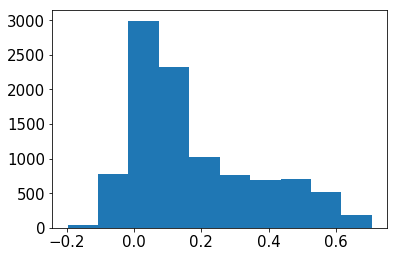

In [24]:
print(np.average(-elli1['fpfs_RE']))
plt.hist(-elli1['fpfs_RE'])